In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import ipywidgets as widgets

In [2]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

In [3]:
def candlepot(date, ope, hig, low, close):
    fig = go.Figure(data=[go.Candlestick(x=date,
                open=ope,
                high=hig,
                low=low,
                close=close)])

    fig.show()

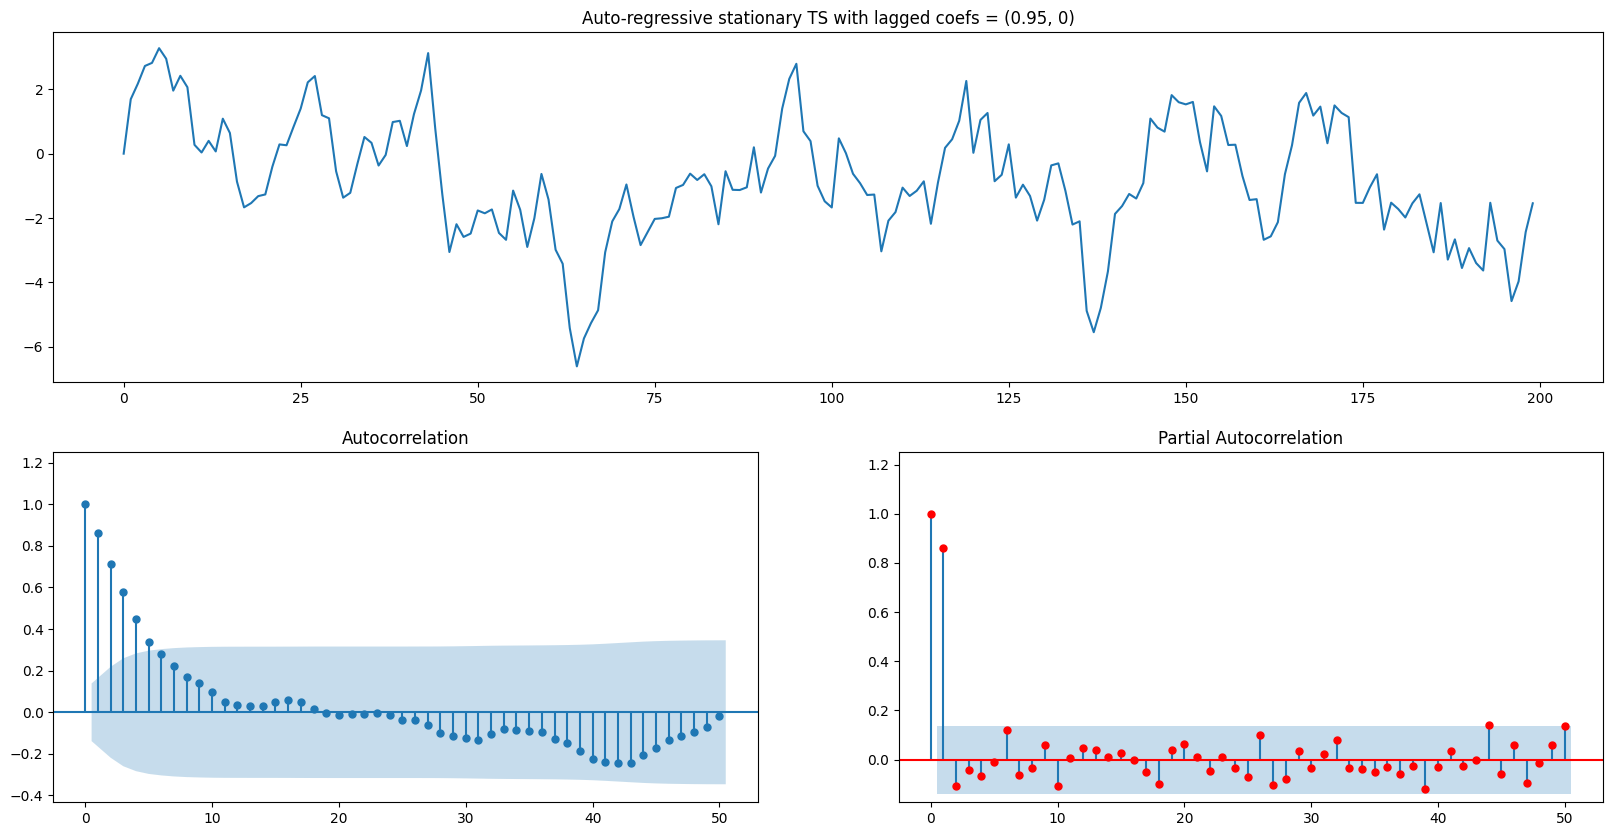

In [4]:
def plot_ar_process(ar1, ar2=0, diff=0, n=500, mu=0, sigma=1, show_plot=True, return_y=False):
    '''
    Plot an auto-regressive time series, as well as its ACF/PACF plots
    '''
    X=np.arange(n)
    y_list = []
    y0 = 0
    y1 = 0
    for i in range(n):
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        y_new = ar1 * y1 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma)
        y0 = y1
        y1 = y_new.copy()
        y_list.append(y0)
    if diff > 0:
        for i in range(diff):
            y_list = list(pd.Series(y_list).diff())
        y_list = y_list[diff:]
        X = X[diff:]
    if show_plot:
        fig = plt.figure(figsize=(20,10))
        ax1 = fig.add_subplot(2,1,1)
        ax1.set_title(f'Auto-regressive stationary TS with lagged coefs = ({ar1}, {ar2})')
        ax2 = fig.add_subplot(2,2,3)
        ax3 = fig.add_subplot(2,2,4)
        ax1.plot(X,y_list)
        plot_acf(y_list, lags=50, auto_ylims=True,ax=ax2);
        plot_pacf(y_list, lags=50, method='ywm', auto_ylims=True, ax=ax3, color='r');
        plt.show()
    if return_y:
        return y_list

plot_ar_process(ar1=0.95, ar2=0, diff=0, n=200, mu=0, sigma=1, show_plot=True, return_y=False)

In [1022]:
def norm_params(ar1=0.95, ar2=0, diff=0, n=500, mu=0, sigma=1):

    
    X = pd.to_datetime(np.arange(n), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low = []
    df_high = []
    df_close = []
    df_open = []

    y0 = 0
    y1 = 0
    for i in range(n):
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        y_low = ar1 * y1 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma)
        
        y_high = y_low + abs(scipy.stats.norm.rvs(mu,sigma))
        y_close = np.random.uniform(y_low, y_high)
        y_open = np.random.uniform(y_low, y_high)
        y0 = y1
        y1 = y_low.copy()
        df_low.append(y0)
        df_high.append(y_high)
        df_close.append(y_close)
        df_open.append(y_open)
    return X, df_open, df_high, df_low, df_close

    

In [1030]:
def norm1_params(ar1=0.95, ar2=0, diff=0, n=500, mu=0, sigma=1, h=2):

    
    X = pd.to_datetime(np.arange(n), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low = []
    df_high = []
    df_close = []
    df_open = []

    y0 = 0
    y1 = 0
    for i in range(n):
        df_open.append(ar1 * y1 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma))
        y1 = df_open[-1]
    for i in range(n):       
        if i != (n-1):
            df_close.append(df_open[i+1])  
        else:
            df_close.append(df_open[i]) 
    for i in range(n): 
        df_low.append(min([df_close[i],df_open[i]]) - np.random.uniform(0,h))
        df_high.append(max([df_close[i],df_open[i]]) + np.random.uniform(0,h))
        
    return X, df_open, df_high, df_low, df_close

    

In [1038]:

date, ope, hig, low, close = norm1_params(ar1=0.95, ar2=0, diff=0, n=500, mu=3, sigma=5, h=2)
candlepot(date, ope, hig, low, close)

In [7]:
def up_down(ar1=0.95, ar2=0, diff=0, n=500, mu=0, sigma=1):

    
    X = pd.to_datetime(np.arange(n), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low = []
    df_high = []
    df_close = []
    df_open = []
    
    y0 = 0
    y1 = 0
    for i in range(n):
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        if (i<(n/4)) | ((2*n/4)<i<(3*n/4)):
            y_low = ar1 * y1 + ar2* y0 + abs(scipy.stats.norm.rvs(mu,sigma))
        else:
            y_low = ar1 * y1 + ar2* y0 - abs(scipy.stats.norm.rvs(mu,sigma))
        
        y_high = y_low + scipy.stats.norm.rvs(mu,sigma)
        y_close = np.random.uniform(y_low, y_high)
        y_open = np.random.uniform(y_low, y_high)
        y0 = y1
        y1 = y_low.copy()
        df_low.append(y0)
        df_high.append(y_high)
        df_close.append(y_close)
        df_open.append(y_open)
    return X, df_open, df_high, df_low, df_close

    

In [1021]:
date, ope, hig, low, close = up_down(ar1=0.95, ar2=0, diff=0, n=500, mu=1, sigma=1)
candlepot(date, ope, hig, low, close)

In [9]:
def uvedoble(ar1=0.95, ar2=0, diff=0, n=500, mu=0, sigma=1):

    
    X = pd.to_datetime(np.arange(n), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low = []
    df_high = []
    df_close = []
    df_open = []
    
    y0 = 0
    y1 = -sigma*10
    m=0
    l=0
    for i in range(n):
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        if i<10:
            y_low = ar1 * y1 + ar2* y0 - abs(scipy.stats.norm.rvs(mu,sigma))
        elif abs(df_low[-1]-df_low[-6])>5:
            y_low = ar1 * y1 + ar2* y0 - abs(scipy.stats.norm.rvs(mu,sigma))
        elif (m < 20) | (abs(df_low[-1]-df_low[-3])<1):      
            y_low = ar1 * y1 + ar2* y0 + abs(scipy.stats.norm.rvs(mu,sigma*0.2))
            m+=1
            
        elif (l < 20) | (abs(df_low[-1]-df_low[-3])<1):
            y_low = ar1 * y1 + ar2* y0 - abs(scipy.stats.norm.rvs(mu,sigma*0.2))
            l+=1
        else:
            y_low = ar1 * y1 + ar2* y0 - abs(scipy.stats.norm.rvs(mu,sigma))

        y_high = y_low + scipy.stats.norm.rvs(mu,sigma)
        y_close = np.random.uniform(y_low, y_high)
        y_open = np.random.uniform(y_low, y_high)
        y0 = y1
        y1 = y_low.copy()
        df_low.append(y0)
        df_high.append(y_high)
        df_close.append(y_close)
        df_open.append(y_open)
            
            
        
    return X, df_open, df_high, df_low, df_close

    

In [10]:
date, ope, hig, low, close = uvedoble(ar1=0.95, ar2=0, diff=0, n=500, mu=1, sigma=20)
candlepot(date, ope, hig, low, close)

In [11]:
def norm_params(ar1=0.95, ar2=0, diff=0, n=500, mu=0, sigma=1):

    
    X = pd.to_datetime(np.arange(n), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low = []
    df_high = []
    df_close = []
    df_open = []

    y0 = 0
    y1 = 0
    
    for i in range(n):
        
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        y_low = ar1 * y1 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma)
        
        y_high = y_low + abs(scipy.stats.norm.rvs(mu,sigma))
        y_close = np.random.uniform(y_low, y_high)
        y_open = np.random.uniform(y_low, y_high)
        y0 = y1
        y1 = y_low.copy()
        df_low.append(y0)
        df_high.append(y_high)
        df_close.append(y_close)
        df_open.append(y_open)
    return X, df_open, df_high, df_low, df_close

    

In [19]:
date, ope, hig, low, close = norm_params(ar1=0.95, ar2=0, diff=0, n=500, mu=3, sigma=5)
candlepot(date, ope, hig, low, close)

In [308]:
def norm_w(n=500):

    par = round(n/3)
    X = pd.to_datetime(np.arange(par*3), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low1 = []
    df_low2 = []
    df_low3 = []
    df_high1 = []
    df_high2 = []
    df_high3 = []
    df_close = []
    df_open1 = []
    df_open3=[]
    df_close1=[]
    df_close2=[]
    df_close3=[]

    
    x = np.linspace(-1.4,3.4,par)
    noise = np.random.normal(0,2,par)
    y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    #y_1 = -2*x[:par/4] 
    #y_2 = 2*x[par/4:par/2]
    df_open2 = 4*y_open2+2*noise
    df_open2 = list(df_open2 + np.random.uniform(-25,25))
    for i in range(par):
        
        if i == 0:
            df_open3.append(df_open2[-1])
            y2 = df_open2[-1]
            
            df_open1.append(df_open2[0])
            y1 = df_open1[-1]
        else:    
            df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(3,5))
            y2 = df_open3[-1]
            df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(3,5))
            y1 = df_open1[-1]
    print(df_open1)
    df_open1.reverse()
    print(df_open1)       
    for i in range(par):
        
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        if i != (par-1):
            df_close1.append(df_open1[i+1])
            df_close2.append(df_open2[i+1]) 
            df_close3.append(df_open3[i+1])  
        else:
            
            df_close1.append(df_open1[i])
            df_close2.append(df_open2[i])
            df_close3.append(df_open3[i])
        
        
        
    for i in range(par):
        
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        df_low1.append(min([df_close1[i],df_open1[i]]) - np.random.uniform(0,0.1))
        df_low2.append(min([df_close2[i],df_open2[i]]) - np.random.uniform(0,0.1))
        df_low3.append(min([df_close3[i],df_open3[i]]) - np.random.uniform(0,0.1))
        df_high1.append(max([df_close1[i],df_open1[i]]) + np.random.uniform(0,0.1))
        df_high2.append(max([df_close2[i],df_open2[i]]) + np.random.uniform(0,0.1))
        df_high3.append(max([df_close3[i],df_open3[i]]) + np.random.uniform(0,0.1))

    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    print(type(df_open1))
    print(type(df_open2))
    print(type(df_open3))
    df_low = df_low1 + df_low2 + df_low3   
    return X, df_open, df_high, df_low, df_close

    

In [341]:
date, ope, hig, low, close = norm_w(n=500)
candlepot(date, ope, hig, low, close)

[-5.4396197156195925, -6.451244358697032, -9.475813806731615, -13.769597459397492, -2.9006387692175473, -0.557489759820629, 5.307677912403425, 8.437333385847516, 20.692026563639594, 29.617864317115956, 24.353873305885617, 21.13316578015629, 29.388463466020625, 34.773778715300985, 43.55477970029303, 38.09114824761407, 32.53342675190369, 28.837160485024448, 29.318848420635756, 27.285506560872758, 44.571799163180614, 42.727754362242635, 49.35691912142337, 49.7248307501479, 52.872022748106545, 56.2268875371387, 48.53615007502468, 49.927285556919045, 51.67206156763142, 48.94784832277127, 47.97190865317286, 45.95851177005023, 51.09351669987815, 55.62516185346469, 58.63277674915713, 66.01564580193009, 64.98540969936924, 56.18935250607929, 51.97989057126317, 57.0291993178087, 60.73195789328913, 60.416071417858845, 64.29388197208634, 63.72178786293283, 70.3026826526391, 72.64313033461592, 68.50742088823279, 75.15106452292338, 74.47259208091351, 69.78030324936817, 79.31620417563222, 82.715273580

In [928]:
def rand_spot_w(n=500):

    par = round(n/3)
    X = pd.to_datetime(np.arange(par*3), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low1 = []
    df_low2 = []
    df_low3 = []
    df_high1 = []
    df_high2 = []
    df_high3 = []
    df_close = []
    df_open1 = []
    df_open3=[]
    df_close1=[]
    df_close2=[]
    df_close3=[]

    x = np.linspace(-1.4,3.4,par)
    noise = np.random.normal(0,2,par)
    y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    #y_1 = -2*x[:par/4] 
    #y_2 = 2*x[par/4:par/2]
    df_open2 = 4*y_open2+2*noise
    df_open2 = list(df_open2 + np.random.uniform(-25,25))
    
    #num = np.random.randint(1,4)
    num = 2
    print(num)
    
    if num == 2:
        
        for i in range(par):
        
            if i == 0:
                df_open3.append(df_open2[-1])
                y2 = df_open2[-1]
                
                df_open1.append(df_open2[0])
                y1 = df_open1[-1]
            else:    
                df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(3,5))
                y2 = df_open3[-1]
                df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(3,5))
                y1 = df_open1[-1]
        df_open1.reverse()
    elif num == 1:
        for i in range(par):
        #2 - 3 - 1
            if i == 0:
                df_open3.append(df_open2[-1])
                y2 = df_open2[-1]
                
            else:    
                df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(3,5))
                y2 = df_open3[-1]
        
        for i in range(par):
            
            if i == 0:
                df_open1.append(df_open3[-1])
                y1 = df_open3[-1]
                
            else:    
                df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(3,5))
                y1 = df_open3[-1]
    elif num == 3:
        for i in range(par):
        #1 - 3 - 2
            if i == 0:
                df_open3.append(df_open2[0])
                y2 = df_open2[0]
                
            else:    
                df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(3,5))
                y2 = df_open3[-1]
        
        df_open3.reverse()
        
        for i in range(par):
            
            if i == 0:
                df_open1.append(df_open3[0])
                y1 = df_open3[0]
                
            else:    
                df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(3,5))
                y1 = df_open3[-1]
    
        df_open1.reverse()
         
    for i in range(par):
        
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        if i != (par-1):
            df_close1.append(df_open1[i+1])
            df_close2.append(df_open2[i+1]) 
            df_close3.append(df_open3[i+1])  
        else:
            
            df_close1.append(df_open1[i])
            df_close2.append(df_open2[i])
            df_close3.append(df_open3[i])
        
        
        
    for i in range(par):
        
        # build an AR process of params (beta_1, beta_2) = (ar1, ar2)
        # With noise epsilon(t) = Normal(mu, sigma)
        df_low1.append(min([df_close1[i],df_open1[i]]) - np.random.uniform(0,0.1))
        df_low2.append(min([df_close2[i],df_open2[i]]) - np.random.uniform(0,0.1))
        df_low3.append(min([df_close3[i],df_open3[i]]) - np.random.uniform(0,0.1))
        df_high1.append(max([df_close1[i],df_open1[i]]) + np.random.uniform(0,0.1))
        df_high2.append(max([df_close2[i],df_open2[i]]) + np.random.uniform(0,0.1))
        df_high3.append(max([df_close3[i],df_open3[i]]) + np.random.uniform(0,0.1))

    if num == 2:
        
        df_open = df_open1+df_open2+df_open3    
        df_close = df_close1+df_close2+df_close3
        df_high = df_high1 + df_high2 + df_high3
        df_low = df_low1 + df_low2 + df_low3
    elif num == 1:
        
        df_open = df_open2+df_open3+df_open1    
        df_close = df_close2+df_close3+df_close1
        df_high = df_high2 + df_high3 + df_high1
        df_low = df_low2 + df_low3 + df_low1
    elif num == 3:
        df_open = df_open1+df_open3+df_open2    
        df_close = df_close1+df_close3+df_close2
        df_high = df_high1 + df_high3 + df_high2
        df_low = df_low1 + df_low3 + df_low2
    
    return X, df_open, df_high, df_low, df_close

    

In [938]:
date, ope, hig, low, close = rand_spot_w(n=500)
candlepot(date, ope, hig, low, close)

2


In [864]:
def rand_w(n=500, mu=3, sigma=5, h=1, noise_level=2):

    num_2 = np.random.randint(50,n/3+1)
    num_1 = np.random.randint(1,n-num_2+1)
    num_3 = np.random.randint(1,n-num_2-num_1+1)
    
    X = pd.to_datetime(np.arange(num_1+num_2+num_3), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low1 = []
    df_low2 = []
    df_low3 = []
    df_high1 = []
    df_high2 = []
    df_high3 = []
    df_close = []
    df_open1 = []
    df_open3=[]
    df_close1=[]
    df_close2=[]
    df_close3=[]
    
    
    x = np.linspace(-1.4,3.4,num_2)
    noise = np.random.normal(0,noise_level,num_2)
    y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    #y_1 = -2*x[:par/4] 
    #y_2 = 2*x[par/4:par/2]
    df_open2 = 4*y_open2+2*noise
    df_open2 = list(df_open2 + np.random.uniform(-25,25))
    
    num = np.random.randint(1,4)
    
    
    
    if num == 2:
        
        for i in range(num_1):
        
            if i == 0:
                df_open1.append(df_open2[0])
                y1 = df_open1[-1]
            else:    
                
                df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(mu,sigma))
                y1 = df_open1[-1]
        
        for i in range(num_3):
            if i == 0:
                df_open3.append(df_open2[-1])
                y2 = df_open2[-1]
                
            else:    
                df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(mu,sigma))
                y2 = df_open3[-1]
            
        df_open1.reverse()
    elif num == 1:
        for i in range(num_3):
        #2 - 3 - 1
            if i == 0:
                df_open3.append(df_open2[-1])
                y2 = df_open2[-1]
                
            else:    
                df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(mu,sigma))
                y2 = df_open3[-1]
        
        for i in range(num_1):
            
            if i == 0:
                df_open1.append(df_open3[-1])
                y1 = df_open3[-1]
                
            else:    
                df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(mu,sigma))
                y1 = df_open3[-1]
    elif num == 3:
        for i in range(num_3):
        #1 - 3 - 2
            if i == 0:
                df_open3.append(df_open2[0])
                y2 = df_open2[0]
                
            else:    
                df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(mu, sigma))
                y2 = df_open3[-1]
        
        df_open3.reverse()
        
        for i in range(num_1):
            
            if i == 0:
                df_open1.append(df_open3[0])
                y1 = df_open3[0]
                
            else:    
                df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(mu,sigma))
                y1 = df_open3[-1]
    
        df_open1.reverse()
    
    for i in range(num_1):
        if i != (num_1-1):
            
            df_close1.append(df_open1[i+1])  
        else:
            
            df_close1.append(df_open1[i])
            
    for i in range(num_2):
        if i != (num_2-1):
            df_close2.append(df_open2[i+1])
              
        else:
            
            df_close2.append(df_open2[i])
    
    for i in range(num_3):
        if i != (num_3-1):
       
            df_close3.append(df_open3[i+1])  
        else:
            
            df_close3.append(df_open3[i])   
        
        
    for i in range(num_1):
        
        df_low1.append(min([df_close1[i],df_open1[i]]) - np.random.uniform(0,h))
        
        df_high1.append(max([df_close1[i],df_open1[i]]) + np.random.uniform(0,h))
    
    for i in range(num_2):
       
        df_low2.append(min([df_close2[i],df_open2[i]]) - np.random.uniform(0,h))
        df_high2.append(max([df_close2[i],df_open2[i]]) + np.random.uniform(0,h))
    for i in range(num_3):
        
        df_low3.append(min([df_close3[i],df_open3[i]]) - np.random.uniform(0,h))
        df_high3.append(max([df_close3[i],df_open3[i]]) + np.random.uniform(0,h))
    if num == 2:
        
        df_open = df_open1+df_open2+df_open3    
        df_close = df_close1+df_close2+df_close3
        df_high = df_high1 + df_high2 + df_high3
        df_low = df_low1 + df_low2 + df_low3
    elif num == 1:
        
        df_open = df_open2+df_open3+df_open1    
        df_close = df_close2+df_close3+df_close1
        df_high = df_high2 + df_high3 + df_high1
        df_low = df_low2 + df_low3 + df_low1
    elif num == 3:
        df_open = df_open1+df_open3+df_open2    
        df_close = df_close1+df_close3+df_close2
        df_high = df_high1 + df_high3 + df_high2
        df_low = df_low1 + df_low3 + df_low2
    
    return X, df_open, df_high, df_low, df_close

    

In [916]:
date, ope, hig, low, close = rand_w(n=500, mu=1, sigma=5, h=2, noise_level=3)
candlepot(date, ope, hig, low, close)

In [370]:
def num(n):
    num_2 = np.random.randint(50,n/3+1)
    num_1 = np.random.randint(1,n-num_2-1)
    num_3 = n-num_2-num_1
    return num_1, num_2, num_3

In [376]:
def X_sart_end(num_1, num_2, num_3):
    X = pd.to_datetime(np.arange(num_1+num_2+num_3), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    start = X[num_1]
    end = X[num_1+num_2]
    return X, start, end

In [795]:
def create_rand_open(num_1, num_3, df_open2):
   
    df_open1=[]
    df_open3=[]
    for i in range(num_1):
        
        if i == 0:
            df_open1.append(0)
            y1 = df_open1[-1]
        else:    
            
            df_open1.append(0.95 * y1 + np.random.uniform(-5,5))
            
            y1 = df_open1[-1]
        
    for i in range(num_3):
        if i == 0:
            df_open3.append(0)
            y1 = df_open3[-1]
        else:    
            
            df_open3.append(0.95 * y1 + np.random.uniform(-5,5))
           
            y1 = df_open3[-1]
            
        
    df_open1.reverse()
    df_open1 = list(np.array(df_open1) + df_open2[0])
    df_open3 = list(np.array(df_open3) +df_open2[-1])
    
    
    return df_open1, df_open3


In [454]:
def create_norm_open(num_1, num_3, df_open2, mu, sigma):
    df_open1=[]
    df_open3=[]
    for i in range(num_1):
        
            if i == 0:
                df_open1.append(0)
                y1 = df_open1[-1]
            else:    
                
                df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(mu,sigma))
                y1 = df_open1[-1]
        
    for i in range(num_3):
        if i == 0:
            df_open3.append(df_open2[-1])
            y2 = df_open2[-1]
            
        else:    
            df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(mu,sigma))
            y2 = df_open3[-1]
        
    df_open1.reverse()
    df_open1 = list(np.array(df_open1) + df_open2[0])

    return df_open1, df_open3

In [583]:
def create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2):
    y0=0
    df_open1=[]
    df_open3=[]
    for i in range(num_1):
        
        if i == 0:
            df_open1.append(0)
            y1 = df_open1[-1]
        else:    
            
            df_open1.append(ar1 * y1 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma))
            y0=y1
            y1 = df_open1[-1]
        
    for i in range(num_3):
        if i == 0:
            df_open3.append(0)
            y1 = df_open3[-1]
        else:    
            
            df_open3.append(ar1 * y1 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma))
            y0=y1
            y1 = df_open3[-1]
            
        
    df_open1.reverse()
    df_open1 = list(np.array(df_open1) + df_open2[0])
    df_open3 = list(np.array(df_open3) +df_open2[-1])
    
    
    return df_open1, df_open3

In [384]:
def create_open(num_1, num_3, df_open2, mu, sigma):
    df_open1=[]
    df_open3=[]
    for i in range(num_1):
        
            if i == 0:
                df_open1.append(df_open2[0])
                y1 = df_open1[-1]
            else:    
                
                df_open1.append(0.95 * y1 + scipy.stats.norm.rvs(mu,sigma))
                y1 = df_open1[-1]
        
    for i in range(num_3):
        if i == 0:
            df_open3.append(df_open2[-1])
            y2 = df_open2[-1]
            
        else:    
            df_open3.append(0.95 * y2 + scipy.stats.norm.rvs(mu,sigma))
            y2 = df_open3[-1]
        
    df_open1.reverse()
    return df_open1, df_open3

In [399]:
def create_close(df_open1, df_open2, df_open3):  
    df_close1=[]
    df_close2=[]
    df_close3=[]
    for i in range(len(df_open1)):
        if i != (len(df_open1)-1):
            
            df_close1.append(df_open1[i+1])  
        else:
            
            df_close1.append(df_open1[i])
            
    for i in range(len(df_open2)):
        if i != (len(df_open2)-1):
            df_close2.append(df_open2[i+1])
              
        else:
            
            df_close2.append(df_open2[i])
    
    for i in range(len(df_open3)):
        if i != (len(df_open3)-1):
       
            df_close3.append(df_open3[i+1])  
        else:
            
            df_close3.append(df_open3[i])  
    return df_close1, df_close2, df_close3

In [424]:
def create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h):
    df_low1=[]
    df_high1=[] 
    df_low2=[]
    df_high2=[]
    df_low3=[]
    df_high3=[]
    for i in range(len(df_open1)):
        
        df_low1.append(min([df_close1[i],df_open1[i]]) - np.random.uniform(0,h))
        df_high1.append(max([df_close1[i],df_open1[i]]) + np.random.uniform(0,h))
    for i in range(len(df_open2)):
       
        df_low2.append(min([df_close2[i],df_open2[i]]) - np.random.uniform(0,h))
        df_high2.append(max([df_close2[i],df_open2[i]]) + np.random.uniform(0,h))
    for i in range(len(df_open3)):
        
        df_low3.append(min([df_close3[i],df_open3[i]]) - np.random.uniform(0,h))
        df_high3.append(max([df_close3[i],df_open3[i]]) + np.random.uniform(0,h))
        
    return df_low1, df_high1, df_low2, df_high2, df_low3, df_high3

In [425]:
def final_w(n=500, mu=3, sigma=5, h=1, noise_level=2):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    
    x = np.linspace(-1.4,3.4,num_2)
    noise = np.random.normal(0,noise_level,num_2)
    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    
    b = np.random.uniform(3.9,4.1)
    c = np.random.uniform(4,7)
    d = np.random.uniform(1,5)
    
    y_open2 = x**4 - b*(x**3)+ x**2 + c*x - d
    df_open2 = 4*y_open2+2*noise
    df_open2 = list(df_open2 + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_open(num_1, num_3, df_open2, mu, sigma)
           
    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)
        
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
    
        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [426]:
def fig_plot(date, ope, hig, low, close, start, end):
    fig = go.Figure(data=[go.Candlestick(x=date,
                open=ope,
                high=hig,
                low=low,
                close=close)])
    fig.add_vline(x = start)
    fig.add_vline(x = end)
    fig.show()
    

In [429]:
date, ope, hig, low, close, start, end = final_w(n=500, mu=1, sigma=5, h=2, noise_level=3)
fig_plot(date, ope, hig, low, close, start, end)

In [ ]:
def norm1_params(ar1=0.95, ar2=0, diff=0, n=500, mu=0, sigma=1, h=2):

    
    X = pd.to_datetime(np.arange(n), unit='D',
        origin=pd.Timestamp('2017-05-08'))
    df_low = []
    df_high = []
    df_close = []
    df_open = []

    y0 = 0
    y1 = 0
    for i in range(n):
        df_open.append(ar1 * y1 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma))
        y1 = df_open[-1]
    for i in range(n):       
        if i != (n-1):
            df_close.append(df_open[i+1])  
        else:
            df_close.append(df_open[i]) 
    for i in range(n): 
        df_low.append(min([df_close[i],df_open[i]]) - np.random.uniform(0,h))
        df_high.append(max([df_close[i],df_open[i]]) + np.random.uniform(0,h))
        
    return X, df_open, df_high, df_low, df_close

    

In [ ]:
date, ope, hig, low, close = norm1_params(ar1=0.95, ar2=0, diff=0, n=500, mu=3, sigma=5, h=2)
candlepot(date, ope, hig, low, close)

In [433]:
def final_m(n=500, mu=3, sigma=5, h=1, noise_level=2):

    num_1, num_2, num_3 = num(n)
       
    X, start, end = X_sart_end(num_1, num_2, num_3)

    x = np.linspace(-1.4,3.4,num_2)
    noise = np.random.normal(0,noise_level,num_2)
    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    
    b = np.random.uniform(3.9,4.1)
    c = np.random.uniform(4,7)
    d = np.random.uniform(1,5)
    
    y_open2 = -x**4 + b*(x**3)- x**2 - c*x + d
    df_open2 = 4*y_open2+2*noise
    df_open2 = list(df_open2 + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_open(num_1, num_3, df_open2, mu, sigma)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)

    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
     
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [436]:
date, ope, hig, low, close, start, end = final_m(n=500, mu=1, sigma=5, h=2, noise_level=3)
fig_plot(date, ope, hig, low, close, start, end)

In [1170]:
np.sin(90)

0.8939966636005579

In [464]:
def bearish_flag(n=500, mu=3, sigma=5, h=1, noise_level=2):

    num_1, num_2, num_3 = num(n)
       
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    a = np.random.uniform(2,8)
    x_1 = np.linspace(-10,0,round(num_2/3))
    x_2 = np.linspace(0,20,round((num_2/3)*2))
    noise_1 = np.random.normal(0,noise_level,round(num_2/3))
    noise_2 = np.random.normal(0,(a/4)*noise_level,round((num_2/3)*2))

    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    m = np.random.uniform(np.sqrt(3),5)
    y_1 = m*abs(x_1)
    y_1 = 4*y_1 + 2*noise_1
    
    n = np.random.uniform(0.2,0.8)
    
    y_2 = n*x_2 + 3*np.sin(x_2)
    y_2 = 4*y_2 + 2*noise_2
    
    df_open2 = list(y_1) + list(y_2)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_norm_open(num_1, num_3, df_open2, mu, sigma)
    
    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)

        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [466]:
date, ope, hig, low, close, start, end = bearish_flag(n=500, mu=1, sigma=5, h=2, noise_level=3)
fig_plot(date, ope, hig, low, close, start, end)

# -1 < 1 - ar1*z - ar2*z**2 < 1

In [587]:
def bullish_flag(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    
    a = np.random.uniform(2,8)
    x_1 = np.linspace(-10,0,round(num_2/3))
    x_2 = np.linspace(-0.5*np.pi,20,round((num_2/3)*2))
    noise_1 = np.random.normal(0,noise_level,round(num_2/3))
    noise_2 = np.random.normal(0,(a/4)*noise_level,round((num_2/3)*2))

    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    m = np.random.uniform(np.sqrt(3),5)
    y_1 = 4*m*(x_1) + 3*noise_1
    
    n = np.random.uniform(0.2,0.8)
    
    y_2 = -n*x_2 - 3*np.sin(x_2)
    y_2 = 4*y_2 + 2*noise_2
    
    df_open2 = list(y_1) + list(y_2)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)
    
    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)
        
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [596]:
date, ope, hig, low, close, start, end = bullish_flag(n=500, mu=1, sigma=5, h=2, noise_level=3, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

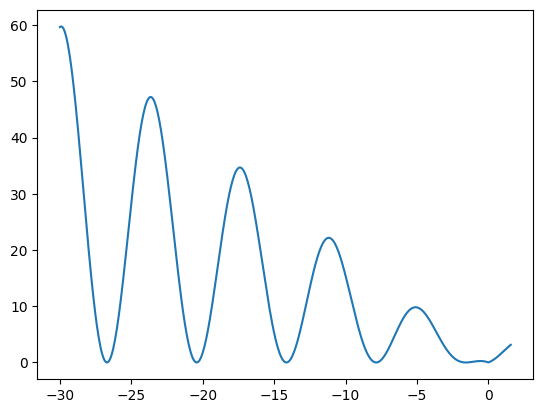

In [1874]:
x=np.linspace(-30,0.5*np.pi,500)
x2 = np.flip(x)
y = abs(np.sin(x)*x+x)

plt.plot(x,y)

In [ ]:

    for i in range(num_1):
    
        if i == 0:
            df_open1.append(0)    
            y1 = df_open1[-1]
        else:    
            
            df_open1.append(ar1 * y1 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma)+np.random.uniform(0,2))
            y0=y1
            y1 = df_open1[-1]
    
    for i in range(num_3):
        if i == 0:
            df_open3.append(df_open2[-1])
            y2 = df_open2[-1]
            
        else:    
            df_open3.append(ar1 * y2 + ar2* y0 + scipy.stats.norm.rvs(mu,sigma)+np.random.uniform(0,2))
            y0=y2
            y2 = df_open3[-1]
        
    df_open1.reverse()
    df_open1 = list(np.array(df_open1) + df_open2[0])

In [626]:
def bullish_pennant(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    
    x_1 = np.linspace(-10,0,round(num_2/3))
    #x_2 = np.linspace(0,20,round((num_2/3)*2))
    noise_1 = np.random.normal(0,0.7*noise_level,round(num_2/3))
    noise_2 = np.random.normal(0,noise_level,round((num_2/3)*2))

    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    m = np.random.uniform(2,5)
    y_1 = 4*m*(x_1) + 3*noise_1
    
    n = np.random.uniform(0.2,0.8)
    
    x_2=np.linspace(-0.5*np.pi,30,round((num_2/3)*2))
    x2_2 = np.flip(x_2)
    y_2 = -0.1*x_2 - 3*np.sin(x_2)*((x2_2**2)/200)
    y_2 = 2*y_2 + 2*noise_2
    y_2 = y_2 - y_2[0]
    df_open2 = list(y_1) + list(y_2)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)
            
    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)

    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [628]:
date, ope, hig, low, close, start, end = bullish_pennant(n=500, mu=1, sigma=5, h=5, noise_level=3, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

In [651]:
def bearish_pennant(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
   
    x_1 = np.linspace(-10,0,round(num_2/3))
    #x_2 = np.linspace(0,20,round((num_2/3)*2))
    noise_1 = np.random.normal(0,0.7*noise_level,round(num_2/3))
    noise_2 = np.random.normal(0,noise_level,round((num_2/3)*2))

    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    m = np.random.uniform(2,5)
    y_1 = -4*m*(x_1) - 3*noise_1
    
    n = np.random.uniform(0.2,0.8)
    
    x_2=np.linspace(-0.5*np.pi,30,round((num_2/3)*2))
    x2_2 = np.flip(x_2)
    y_2 = 0.1*x_2 + 3*np.sin(x_2)*((x2_2**2)/200)
    y_2 = 2*y_2 + 2*noise_2
    y_2 = y_2 - y_2[0]
    df_open2 = list(y_1) + list(y_2)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)  
        
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [653]:
date, ope, hig, low, close, start, end = bearish_pennant(n=500, mu=1, sigma=5, h=5, noise_level=3, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

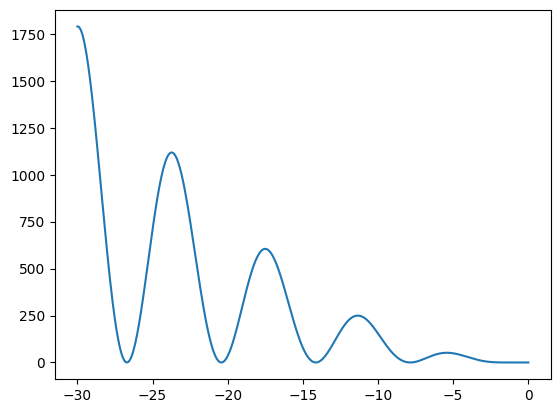

In [1957]:

x=np.linspace(-30,0,500)
y = abs((np.sin(x)*x+x)*x)

plt.plot(x,y)

In [669]:
def descending_triangle(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    
    x_1 = np.linspace(-10,0,round(num_2/3))
    #x_2 = np.linspace(0,20,round((num_2/3)*2))
    noise_1 = np.random.normal(0,0.7*noise_level,round(num_2/3))
    noise_2 = np.random.normal(0,noise_level,round((num_2/3)*2))

    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    m = np.random.uniform(2,5)
    y_1 = -4*m*(x_1) - 3*noise_1
    
    n = np.random.uniform(0.2,0.8)
    
    x_2 =np.linspace(-20,0.5*np.pi,round((num_2/3)*2))
    y_2 = abs((np.sin(x_2)*x_2+x_2)) + 2*noise_2
    
    df_open2 = list(y_1) + list(y_2)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)  
        
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
            
        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [672]:
date, ope, hig, low, close, start, end = descending_triangle(n=500, mu=1, sigma=5, h=5, noise_level=5, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

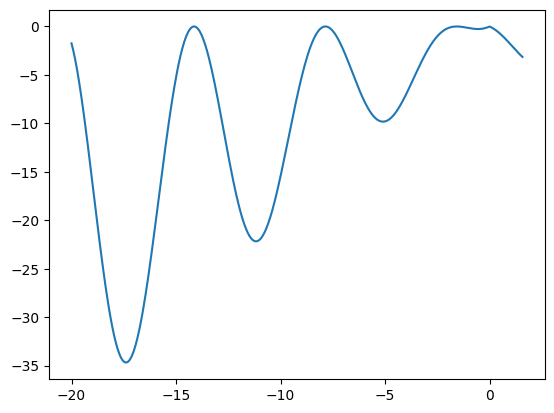

In [2029]:
x_2 =np.linspace(-20,0.5*np.pi,500)
y_2 = -abs((np.sin(x_2)*x_2+x_2)) 
plt.plot(x_2, y_2)
    

In [676]:
def ascending_triangle(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    df_low1 = []
    df_low2 = []
    df_low3 = []
    df_high1 = []
    df_high2 = []
    df_high3 = []
    df_close = []
    df_open1 = []
    df_open3=[]
    df_close1=[]
    df_close2=[]
    df_close3=[]
    y0=0
    
    
    x_1 = np.linspace(-10,0,round(num_2/3))
    #x_2 = np.linspace(0,20,round((num_2/3)*2))
    noise_1 = np.random.normal(0,0.7*noise_level,round(num_2/3))
    noise_2 = np.random.normal(0,noise_level,round((num_2/3)*2))

    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    m = np.random.uniform(2,5)
    y_1 = 4*m*(x_1) - 3*noise_1
    
    n = np.random.uniform(0.2,0.8)
    
    x_2 =np.linspace(-20,0.5*np.pi,round((num_2/3)*2))
    y_2 = -abs((np.sin(x_2)*x_2+x_2)) + 2*noise_2
    
    df_open2 = list(y_1) + list(y_2)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)  
        
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
    
        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [683]:
date, ope, hig, low, close, start, end = ascending_triangle(n=500, mu=1, sigma=5, h=5, noise_level=5, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

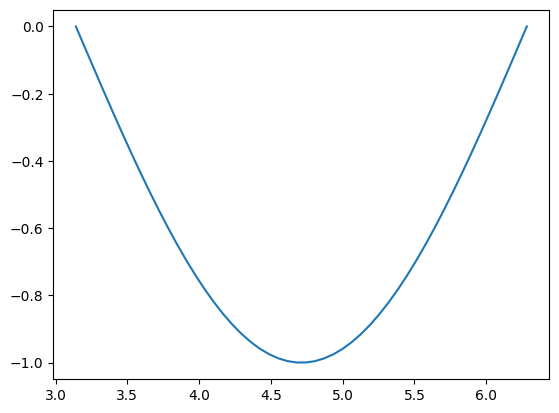

In [2051]:
x = np.linspace(np.pi,2*np.pi)
y = np.sin(x)
plt.plot(x,y)

In [696]:
def cup_handle(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
       
    x_1 = np.linspace(-10,0,round(num_2/3))
    #x_2 = np.linspace(0,20,round((num_2/3)*2))
    noise_1 = np.random.normal(0,0.7*noise_level,round(num_2/3))
    noise_2 = np.random.normal(0,noise_level,round((num_2/3)*2))

    #y_open2 = x**4 - 4*(x**3)+ x**2 + 7*x - 3
    m = np.random.uniform(0.8,5)
    y_1 = 4*m*(x_1) - 3*noise_1
    
    n = np.random.uniform(0.2,0.8)
    
    x_2 = np.linspace(np.pi,2*np.pi,round((num_2/3)*2))
    y_2 = 5*15*np.sin(x_2) + 3*noise_2
    
    df_open2 = list(y_1) + list(y_2)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)   
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
         
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [699]:
date, ope, hig, low, close, start, end = cup_handle(n=500, mu=1, sigma=5, h=5, noise_level=5, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

In [706]:
def head_shoulders(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
          
    x_1 = np.linspace(-0.5*np.pi,2*np.pi,round(num_2/3))
    x_2 = np.linspace(0,np.pi,round(num_2/3))
    
    y_1 = 7*np.sin(x_1) + np.random.normal(0,0.7*noise_level,round(num_2/3))
    m = np.random.uniform(11,25)
    y_2 = m*np.sin(x_2) + np.random.normal(0,0.7*noise_level,round(num_2/3))
    y_3 = 7*np.sin(x_1) + np.random.normal(0,0.7*noise_level,round(num_2/3))
    y_3 = list(y_3)
    y_3.reverse()
    y_1[-1]=0
    y_2[-1]=0
    y_1[0]=0
    y_2[0]=0
    y_3[-1]=0
    y_3[0]=0
    df_open2 = list(y_1) + list(y_2) + list(y_3)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)   
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
    
        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [711]:
date, ope, hig, low, close, start, end = head_shoulders(n=500, mu=1, sigma=5, h=5, noise_level=5, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

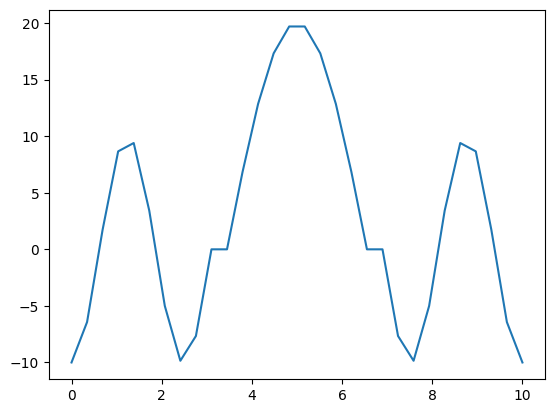

In [18]:
x_1 = np.linspace(-0.5*np.pi,2*np.pi,10)
x_2 = np.linspace(0,np.pi,10)
x = np.linspace(0,10,2*len(x_1)+len(x_2))
y_1 = 10*np.sin(x_1) 
m = np.random.uniform(1.5,3)
y_2 = 20*np.sin(x_2) 
y_3 = 10*np.sin(x_1) 
y_3 = list(y_3)
y_3.reverse()
y = list(y_1) + list(y_2) + list(y_3)
plt.plot(x, y)


In [716]:
def inv_head_shoulders(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
       
    x_1 = np.linspace(-0.5*np.pi,2*np.pi,round(num_2/3))
    x_2 = np.linspace(0,np.pi,round(num_2/3))
    
    y_1 = -7*np.sin(x_1) + np.random.normal(0,0.7*noise_level,round(num_2/3))
    m = np.random.uniform(11,25)
    y_2 = -m*np.sin(x_2) + np.random.normal(0,0.7*noise_level,round(num_2/3))
    y_3 = -7*np.sin(x_1) + np.random.normal(0,0.7*noise_level,round(num_2/3))
    y_3 = list(y_3)
    y_3.reverse()
    y_1[-1]=0
    y_2[-1]=0
    y_1[0]=0
    y_2[0]=0
    y_3[-1]=0
    y_3[0]=0
    df_open2 = list(y_1) + list(y_2) + list(y_3)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)   
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [720]:
date, ope, hig, low, close, start, end = inv_head_shoulders(n=500, mu=1, sigma=5, h=5, noise_level=5, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

In [732]:
def falling_wedge(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    m1 = np.random.uniform(1.6,2.2)
    m2 = np.random.uniform(1.6,2.2)
    m3 = np.random.uniform(1.6,2.2)
    n1 = np.random.uniform(1,1.5)
    n2 = np.random.uniform(1,1.5)

    rep=int(num_2/5)
    x_1 = np.linspace(0,1.5/(m1+n1),rep)
    x_2 = np.linspace(1.5/(m1+n1),2.5/(m2+n1),rep)
    x_3 = np.linspace(2.5/(m2+n1),4/(m2+n2),rep)
    x_4 = np.linspace(4/(m2+n2),5/(m3+n2),rep)
    x_5 = np.linspace(5/(m3+n2),7/(m3+n2),rep)

    y1 = -m1*x_1
    y2 = n1*x_2-1.5
    y3 = -m2*x_3+1
    y4 = n2*x_4-3
    y5 = -m3*x_5+2

    df_open2 = list(y1) + list(y2) + list(y3) + list(y4) + list(y5)
    x = list(x_1) + list(x_2) + list(x_3) + list(x_4) + list(x_5)

    
    df_open2 = list(50*np.array(df_open2)+np.random.normal(0,noise_level,len(df_open2)) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)   
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
       
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [735]:
date, ope, hig, low, close, start, end = falling_wedge(n=500, mu=1, sigma=5, h=6, noise_level=7, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

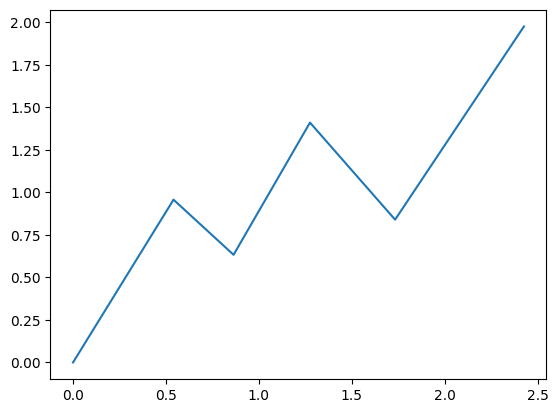

In [259]:
d = np.random.uniform(-25,25)
e = d - np.random.uniform(2,5)
f = e - np.random.uniform(2,5)
a = f - np.random.uniform(2,5)
b = a - np.random.uniform(2,5)
c = b - np.random.uniform(2,5)
d_f = np.random.uniform(2,5)
d_e = np.random.uniform(1,d_f-1)
d_a = np.random.uniform(0.1,d_e-0.5)
e_b = np.random.uniform(0.5,d_f-d_e)
a_c = np.random.uniform(d_f-d_a, d_f)
#d-a, a-e, e-b, b-f, f-c

#x_1 = np.linspace(0,d_a,50)
#x_2 = np.linspace(d_a,d_e,50)
#x_3 = np.linspace(d_e,d_e+e_b,50)
#x_4 = np.linspace(d_e+e_b,d_f,50)
#x_5 = np.linspace(d_f,d_a+a_c,50)

#y1 = (a-d)/(d_a)*x_1 + d
#y2 = (e-a)/(d_e-d_a)*x_2 + a
#y3 = (b-e)/(e_b)*x_3 + e
#y4 = (f-b)/(d_f-(d_e+e_b))*x_4 + b
#y5 = (c-f)/(d_a + a_c-d_f)*x_5 + f
m1 = np.random.uniform(1.6,2.2)
m2 = np.random.uniform(1.6,2.2)
m3 = np.random.uniform(1.6,2.2)
n1 = np.random.uniform(1,1.5)
n2 = np.random.uniform(1,1.5)
x_1 = np.linspace(0,1.5/(m1+n1),50)
x_2 = np.linspace(1.5/(m1+n1),2.5/(m2+n1),50)
x_3 = np.linspace(2.5/(m2+n1),4/(m2+n2),50)
x_4 = np.linspace(4/(m2+n2),5/(m3+n2),50)
x_5 = np.linspace(5/(m3+n2),7/(m3+n2),50)


y1 = m1*x_1
y2 = -n1*x_2+1.5
y3 = m2*x_3-1
y4 = -n2*x_4+3
y5 = m3*x_5-2

df_open2 = list(y1) + list(y2) + list(y3) + list(y4) + list(y5)
x = list(x_1) + list(x_2) + list(x_3) + list(x_4) + list(x_5)
plt.plot(x, df_open2)

In [740]:
def rising_wedge(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    m1 = np.random.uniform(1.6,2.2)
    m2 = np.random.uniform(1.6,2.2)
    m3 = np.random.uniform(1.6,2.2)
    n1 = np.random.uniform(1,1.5)
    n2 = np.random.uniform(1,1.5)

    rep=int(num_2/5)
    x_1 = np.linspace(0,1.5/(m1+n1),rep)
    x_2 = np.linspace(1.5/(m1+n1),2.5/(m2+n1),rep)
    x_3 = np.linspace(2.5/(m2+n1),4/(m2+n2),rep)
    x_4 = np.linspace(4/(m2+n2),5/(m3+n2),rep)
    x_5 = np.linspace(5/(m3+n2),7/(m3+n2),rep)

    y1 = m1*x_1
    y2 = -n1*x_2+1.5
    y3 = m2*x_3-1
    y4 = -n2*x_4+3
    y5 = m3*x_5-2

    df_open2 = list(y1) + list(y2) + list(y3) + list(y4) + list(y5)
    x = list(x_1) + list(x_2) + list(x_3) + list(x_4) + list(x_5)

    
    df_open2 = list(50*np.array(df_open2)+np.random.normal(0,noise_level,len(df_open2)) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)   
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
          
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [750]:
date, ope, hig, low, close, start, end = rising_wedge(n=500, mu=1, sigma=5, h=6, noise_level=7, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

In [758]:
def triple_bottom(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
     
    x_1 = np.linspace(-0.5*np.pi,np.pi,round(num_2/5))
    x_2 = np.linspace(np.pi, 2*np.pi,round(num_2/5))
    x_3 = np.linspace(0,np.pi,round(num_2/5))

    m = np.random.uniform(8,15)

    y_1 = -m*np.sin(x_1) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_2 = -(m/3)*np.sin(x_2) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_3 = -m*np.sin(x_3) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_4 = -(m/3)*np.sin(x_2) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_5 = -m*np.sin(x_1) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_5 = list(y_5)
    y_5.reverse()
    y_1[-1]=0
    y_2[-1]=0
    y_2[0]=0
    y_4[0]=0
    y_4[-1]=0
    y_5[0]=0
    y_3[-1]=0
    y_3[0]=0
    df_open2 = list(y_1) + list(y_2) + list(y_3) + list(y_4) + list(y_5)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)

    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)   
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
       
        
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [794]:
date, ope, hig, low, close, start, end = triple_bottom(n=500, mu=1, sigma=5, h=6, noise_level=4, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)

In [825]:
def triple_top(n=500, mu=3, sigma=5, h=1, noise_level=2, ar1 = 0.95, ar2 = 0):

    num_1, num_2, num_3 = num(n)
      
    X, start, end = X_sart_end(num_1, num_2, num_3)
    
    x_1 = np.linspace(-0.5*np.pi,np.pi,round(num_2/5))
    x_2 = np.linspace(np.pi, 2*np.pi,round(num_2/5))
    x_3 = np.linspace(0,np.pi,round(num_2/5))

    m = np.random.uniform(8,15)

    y_1 = m*np.sin(x_1) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_2 = (m/3)*np.sin(x_2) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_3 = m*np.sin(x_3) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_4 = (m/3)*np.sin(x_2) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_5 = m*np.sin(x_1) + np.random.normal(0,0.7*noise_level,round(num_2/5))
    y_5 = list(y_5)
    y_5.reverse()
    y_1[-1]=0
    y_2[-1]=0
    y_2[0]=0
    y_4[0]=0
    y_4[-1]=0
    y_5[0]=0
    y_3[-1]=0
    y_3[0]=0
    df_open2 = list(y_1) + list(y_2) + list(y_3) + list(y_4) + list(y_5)
    
    df_open2 = list(np.array(df_open2) + np.random.uniform(-25,25))
    
    df_open1, df_open3 = create_ar2_norm_open(num_1, num_3, df_open2, mu, sigma, ar1, ar2)
    #df_open1, df_open3 = create_rand_open(num_1, num_3, df_open2)
    df_close1, df_close2, df_close3 = create_close(df_open1, df_open2, df_open3)   
        
    df_low1, df_high1, df_low2, df_high2, df_low3, df_high3 = create_low_high(df_open1, df_close1, df_open2, df_close2, df_open3, df_close3, h)
    
    df_open = df_open1+df_open2+df_open3    
    df_close = df_close1+df_close2+df_close3
    df_high = df_high1 + df_high2 + df_high3
    df_low = df_low1 + df_low2 + df_low3
    
    
    return X, df_open, df_high, df_low, df_close, start, end

    

In [832]:
date, ope, hig, low, close, start, end = triple_top(n=500, mu=1, sigma=5, h=6, noise_level=4, ar1=0.95, ar2 = 0)
fig_plot(date, ope, hig, low, close, start, end)